In [52]:
import warnings
import numpy as np
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from datetime import datetime
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
from tkinter import*
import tkinter as tk

warnings.simplefilter("ignore")

In [53]:
data = pd.read_csv("employee_reviews.csv", encoding="Latin-1")
data

,id,company,location,dateOfReviews,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars,helpful-count,link
0,1,google,NaN,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 2...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...
5,6,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,NaN,5,4,4,4,5,4,1,https://www.glassdoor.com/Reviews/Google-Revie...
6,7,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,NaN,5,5,4,4,5,4,0,https://www.glassdoor.com/Reviews/Google-Revie...
7,8,google,NaN,"Dec 11, 2018",Former Employee - Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,NaN,5,5,5,5,5,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
8,9,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5,5,5,5,5,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
9,10,google,NaN,"Dec 9, 2018",Current Employee - Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5,5,5,5,5,5,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [54]:
data.shape

(60392, 17)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 17 columns):
id                            60392 non-null int64
company                       60392 non-null object
location                      41012 non-null object
dateOfReviews                 60392 non-null object
job-title                     60392 non-null object
summary                       60286 non-null object
pros                          60392 non-null object
cons                          60392 non-null object
advice-to-mgmt                35779 non-null object
overall-ratings               60392 non-null int64
work-balance-stars            60392 non-null int64
culture-values-stars          60392 non-null int64
carrer-opportunities-stars    60392 non-null int64
comp-benefit-stars            60392 non-null int64
senior-mangement-stars        60392 non-null int64
helpful-count                 60392 non-null int64
link                          60392 non-null object
dtypes: int64(8

In [56]:
#to drop the columns
data.drop(['id', 'advice-to-mgmt', 'helpful-count','link'],axis=1,inplace=True)

In [57]:
data.describe()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars
count,60392.000000,60392.000000,60392.000000,60392.000000,60392.000000,60392.000000
mean,3.811796,3.384438,3.379305,3.630928,3.954663,3.295801
std,1.163910,1.310938,1.693873,1.246032,1.054695,1.351724
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [58]:
companies=data['company'].unique()
companies

array(['google', 'amazon', 'facebook', 'netflix', 'apple', 'microsoft'],
      dtype=object)

In [59]:
data.groupby('company').size()

company
amazon       23614
apple        11725
facebook      1552
google        6535
microsoft    16206
netflix        760
dtype: int64

In [60]:
def reviewcount():
    root= tk.Tk()
    root.geometry("700x600")
    root.resizable(0,0)
    
    sns.set(style='darkgrid')
    pl.figure(figsize =(15,5))
    pl.ylabel('Review Count', fontsize=15)
    data.groupby(['company']).company.count().plot('bar')
    pl.xlabel('Company', fontsize=15)
    pl.title('Companies review count comparison', fontsize=15)
    
    fig=plt.gcf()
    fig.set_size_inches(10,7)
    dataPlot = FigureCanvasTkAgg(fig, root)
    dataPlot.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)    

In [61]:
def datecount():
    root= tk.Tk()
    root.geometry("1000x600")
    
    data.dateOfReviews = data.dateOfReviews.str.strip()
    data = data[data.dateOfReviews != 'None']
    data = data[data.dateOfReviews != 'Jan 0, 0000']
    data = data[dateOfReviews != 'Nov 0, 0000']
    data.dateOfReviews = [datetime.strptime(x, '%b %d, %Y') for x in data.dateOfReviews]
    data['year'] = pd.DatetimeIndex(data.dateOfReviews).year
    
    dataframeDates = data["company","dateOfReviews"]
    dataframeDates = dataframeDates.reset_index(drop=True)
    dataframeDates.sort_values(by='dateOfReviews')
    dataframeDates = dataframeDates.groupby(["company", "dateOfReviews"]).size().reset_index()
    dataframeDates = dataframeDates.rename(columns={0: 'total_reviews'})

    amazon = go.Scatter(
        x=dataframeDates[dataframeDates['company']=='amazon']['dateOfReviews'],
        y=dataframeDates[dataframeDates['company']=='amazon']['total_reviews'],
        name = "Amazon",
        line = dict(color = '#17BECF'),
        opacity = 0.8)

    microsoft = go.Scatter(
        x=dataframeDates[dataframeDates['company']=='microsoft']['dateOfReviews'],
        y=dataframeDates[dataframeDates['company']=='microsoft']['total_reviews'],
        name = "Microsoft",
        line = dict(color = '#7F7F7F'),
        opacity = 0.8)

    apple = go.Scatter(
        x=dataframeDates[dataframeDates['company']=='apple']['dateOfReviews'],
        y=dataframeDates[dataframeDates['company']=='apple']['total_reviews'],
        name = "Apple",
        line = dict(color = '#0fac1f'),
        opacity = 0.8)

    google = go.Scatter(
        x=dataframeDates[dataframeDates['company']=='google']['dateOfReviews'],
        y=dataframeDates[dataframeDates['company']=='google']['total_reviews'],
        name = "Google",
        line = dict(color = '#6335c3'),
        opacity = 0.8)

    facebook = go.Scatter(
        x=dataframeDates[dataframeDates['company']=='facebook']['dateOfReviews'],
        y=dataframeDates[dataframeDates['company']=='facebook']['total_reviews'],
        name = "Facebook",
        line = dict(color = '#808000'),
        opacity = 0.8)

    
    data = [amazon,microsoft,apple,google,facebook]

    layout = dict(
        title='Analysing any trend between number of reviews and dates',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
    )

    fig = dict(data=data, layout=layout)
    
    fig=plt.gcf()
    fig.set_size_inches(9,6)
    dataPlot = FigureCanvasTkAgg(fig,root)
    dataPlot.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
    iplot(fig)

In [62]:
data1=pd.read_csv("employee_reviews.csv", encoding="Latin-1")
data1.drop(['summary', 'pros', 'cons','id', 'advice-to-mgmt', 'helpful-count','link','location',
            'job-title','dateOfReviews'], axis=1,inplace=True)

In [63]:
w=data1['work-balance-stars'].mean()
c=data1['culture-values-stars'].mean()
ca=data1['carrer-opportunities-stars'].mean()
co=data1['comp-benefit-stars'].mean()
s=data1['senior-mangement-stars'].mean()
print(w)
print(c)
print(ca)
print(co)
print(s)

3.3844383362034707
3.379305205987548
3.630927937475162
3.954662869254206
3.295800768313684


In [64]:
data1['remarks']=np.where((data1['work-balance-stars']>data1['work-balance-stars'].mean())
                          &(data1['culture-values-stars']>data1['culture-values-stars'].mean())
                          &(data1['carrer-opportunities-stars']>data1['carrer-opportunities-stars'].mean())
                          &(data1['comp-benefit-stars']>data1['comp-benefit-stars'].mean())
                          &(data1['senior-mangement-stars']>data1['senior-mangement-stars'].mean()), 1, 0)

In [65]:
print('Satisfied Employees:', (data1['remarks']==1).sum())
print('Unsatisfied Employees:', (data1['remarks']==0).sum())

satisfied = np.array(data1[data1['remarks']==1].groupby('company').remarks.count())
unsatisfied = np.array(data1[data1['remarks']==0].groupby('company').remarks.count())

Satisfied Employees: 14848
Unsatisfied Employees: 45544


In [66]:
def satisfiesdUnsatisfied():
    root= tk.Tk()
    root.geometry("700x600")
    root.resizable(0,0)
    
    pl.figure(figsize =(20,10))
    N = 6
    ind = np.arange(N) 
    width = 0.35       
    plt.bar(ind, satisfied, width, label='Satisfied Employees')
    plt.bar(ind + width, unsatisfied, width, label='UnSatisfied Employees')

    plt.ylabel('Total Count', fontsize=15)
    plt.xlabel('Company', fontsize=15)
    plt.title('Satisfied/Unsatisfied Employees by Companies', fontsize=15)

    plt.xticks(ind + width / 2, ('amazon', 'apple', 'facebook', 'google', 'microsoft', 'netflix'))
    plt.legend(loc='best')
    
    fig=plt.gcf()
    fig.set_size_inches(10,7)
    dataPlot = FigureCanvasTkAgg(fig, root)
    dataPlot.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)

In [67]:
dataGoogle=data.loc[data['company'] =='google']
dataMicrosoft=data.loc[data['company'] =='microsoft']
dataApple=data.loc[data['company'] =='apple']
dataFacebook=data.loc[data['company'] =='facebook']
dataAmazon=data.loc[data['company'] =='amazon']
dataNetflix=data.loc[data['company'] =='netflix']

In [68]:
dataGoogle.describe()
dataGoogle
dataApple

,company,location,dateOfReviews,job-title,summary,pros,cons,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars
32461,apple,NaN,"Aug 28, 2014",Current Employee - Anonymous Employee,"Challenging, Rewarding, but ZERO work/life bal...","We work with geniuses - in every department, W...",ZERO ZERO ZERO work/life balance. Execs have b...,4,1,3,3,3,3
32462,apple,"Tempe, AZ","Mar 10, 2017",Current Employee - Specialist,A Company as Meticulous as Their Products!,"Competitive Pay, Great Benefits, Amazing Peopl...",None! I had one of the best times ever at this...,5,4,5,5,4,5
32463,apple,"Lakewood, CO","May 13, 2015",Current Employee - Apple At Home Advisor,At-Home-Advisor,The position is at home. The company is AMAZIN...,The schedule changes every 90 days and you hav...,5,3,5,5,4,5
32464,apple,NaN,"Dec 8, 2018",Current Employee - Anonymous Employee,Good,"Salary, Hours, Time, Career opportunities",They only offer part-time hours,5,3,3,2,5,3
32465,apple,NaN,"Dec 1, 2018",Current Employee - Anonymous Employee,Apple,Great benefits: Tuition reibmursement (even fo...,Requesting time off is a hassle. Only a limite...,5,4,5,4,5,4
32466,apple,"San Diego, CA","Dec 11, 2018",Former Employee - Mac Genius,Genius,Great benefits for retail store Co-workers are...,"Work you to the minute, lots of micro-managing",4,3,5,3,3,4
32467,apple,"Cupertino, CA","Dec 11, 2018",Former Employee - Systems Design Engineer,Great place to work and gain experience,"Good benefits, very good experience, recogniza...","Somewhat lower pay, difficult to advance in ca...",4,2,5,5,4,4
32468,apple,NaN,"Dec 11, 2018",Current Employee - Anonymous Employee,Senior managers,It was ok. It is retail. Great benefits and th...,Just the retail hours.,4,4,5,5,5,5
32469,apple,NaN,"Apr 2, 2017",Current Employee - Anonymous Employee,At Home Advisor T1,=-working from home -generous compensation -go...,=-can get Repetitive -heavy workload -No outsi...,5,5,5,3,4,5
32470,apple,"Cupertino, CA","Dec 10, 2018",Current Employee - Anonymous Employee,N/a,Its Cool To Work For,No Issues Except Working On A Weekend,5,5,1,3,5,5


In [69]:
dataMicrosoft.describe()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars
count,16206.000000,16206.000000,16206.000000,16206.000000,16206.000000,16206.000000
mean,3.794397,3.625694,3.045662,3.667654,4.032951,3.136122
std,1.046613,1.175011,1.752931,1.101007,0.906434,1.241067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [70]:
dataApple.describe()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars
count,11725.000000,11725.000000,11725.000000,11725.000000,11725.000000,11725.000000
mean,3.940981,3.382175,3.619616,3.421578,4.037271,3.447505
std,1.073516,1.293848,1.707638,1.250832,1.013585,1.335260
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [71]:
dataFacebook.describe()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,4.517397,3.931701,4.221649,4.347294,4.567010,4.252577
std,0.955331,1.162148,1.460362,1.033235,0.752829,1.120407
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [72]:
dataAmazon.describe()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars
count,23614.000000,23614.000000,23614.000000,23614.000000,23614.000000,23614.000000
mean,3.586008,3.015753,3.352333,3.592826,3.694503,3.128568
std,1.265949,1.347637,1.565582,1.329474,1.148968,1.407876
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [73]:
dataNetflix.describe()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.380263,3.309211,2.327632,3.082895,4.190789,3.203947
std,1.424010,1.382335,2.076730,1.446352,1.018495,1.513831
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,2.000000,4.000000,2.000000
50%,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [74]:
dataGOverall=dataGoogle.groupby(['overall-ratings'])['overall-ratings'].size()
print("Google: ",dataGOverall)
dataMOverall=dataMicrosoft.groupby(['overall-ratings'])['overall-ratings'].size()
print("Microsoft: ",dataMOverall)
dataAOverall=dataApple.groupby(['overall-ratings'])['overall-ratings'].size()
print("Apple: ",dataAOverall)
dataFOverall=dataFacebook.groupby(['overall-ratings'])['overall-ratings'].size()
print("Facebook: ",dataFOverall)
dataAMOverall=dataAmazon.groupby(['overall-ratings'])['overall-ratings'].size()
print("Amazon: ",dataAMOverall)
dataNOverall=dataNetflix.groupby(['overall-ratings']).size()
print("Netflix: ",dataNOverall)

Google:  overall-ratings
1     134
2     233
3     651
4    1896
5    3621
Name: overall-ratings, dtype: int64
Microsoft:  overall-ratings
1     605
2    1242
3    3528
4    6336
5    4495
Name: overall-ratings, dtype: int64
Apple:  overall-ratings
1     458
2     771
3    2061
4    4150
5    4285
Name: overall-ratings, dtype: int64
Facebook:  overall-ratings
1      47
2      47
3      91
4     238
5    1129
Name: overall-ratings, dtype: int64
Amazon:  overall-ratings
1    2236
2    2507
3    4896
4    7133
5    6842
Name: overall-ratings, dtype: int64
Netflix:  overall-ratings
1    118
2    106
3    125
4    191
5    220
dtype: int64


In [75]:
dataGWork=dataGoogle.groupby(['work-balance-stars'])['work-balance-stars'].size()
print("Google: ",dataGWork)
dataMWork=dataMicrosoft.groupby(['work-balance-stars'])['work-balance-stars'].size()
print("Microsoft: ",dataMWork)
dataAWork=dataApple.groupby(['work-balance-stars'])['work-balance-stars'].size()
print("Apple: ",dataAWork)
dataFWork=dataFacebook.groupby(['work-balance-stars'])['work-balance-stars'].size()
print("Facebook: ",dataFWork)
dataAMWork=dataAmazon.groupby(['work-balance-stars'])['work-balance-stars'].size()
print("Amazon: ",dataAMWork)
dataNWork=dataNetflix.groupby(['work-balance-stars'])['work-balance-stars'].size()
print("Netflix: ",dataNWork)

Google:  work-balance-stars
0      23
1     245
2     430
3    1130
4    1882
5    2825
Name: work-balance-stars, dtype: int64
Microsoft:  work-balance-stars
0      23
1     994
2    1745
3    3926
4    5094
5    4424
Name: work-balance-stars, dtype: int64
Apple:  work-balance-stars
0      14
1    1265
2    1684
3    2891
4    3005
5    2866
Name: work-balance-stars, dtype: int64
Facebook:  work-balance-stars
0      2
1     78
2    113
3    277
4    443
5    639
Name: work-balance-stars, dtype: int64
Amazon:  work-balance-stars
0      49
1    4344
2    3992
3    5971
4    5317
5    3941
Name: work-balance-stars, dtype: int64
Netflix:  work-balance-stars
1    118
2     99
3    164
4    188
5    191
Name: work-balance-stars, dtype: int64


In [76]:
dataGCulture=dataGoogle.groupby(['culture-values-stars'])['culture-values-stars'].size()
print("Google: ",dataGCulture)
dataMCulture=dataMicrosoft.groupby(['culture-values-stars'])['culture-values-stars'].size()
print("Microsoft: ",dataMCulture)
dataACulture=dataApple.groupby(['culture-values-stars'])['culture-values-stars'].size()
print("Apple: ",dataACulture)
dataFCulture=dataFacebook.groupby(['culture-values-stars'])['culture-values-stars'].size()
print("Facebook: ",dataFCulture)
dataAMCulture=dataAmazon.groupby(['culture-values-stars'])['work-balance-stars'].size()
print("Amazon: ",dataAMCulture)
dataNCulture=dataNetflix.groupby(['culture-values-stars'])['work-balance-stars'].size()
print("Netflix: ",dataNCulture)

Google:  culture-values-stars
0     842
1     152
2     176
3     578
4    1371
5    3416
Name: culture-values-stars, dtype: int64
Microsoft:  culture-values-stars
0    2704
1     977
2    1376
3    2980
4    4156
5    4013
Name: culture-values-stars, dtype: int64
Apple:  culture-values-stars
0    1363
1     531
2     639
3    1439
4    2451
5    5302
Name: culture-values-stars, dtype: int64
Facebook:  culture-values-stars
0     100
1      46
2      54
3      82
4     198
5    1072
Name: culture-values-stars, dtype: int64
Amazon:  culture-values-stars
0    1202
1    3034
2    2427
3    4033
4    5415
5    7503
Name: work-balance-stars, dtype: int64
Netflix:  culture-values-stars
0    257
1     90
2     51
3     72
4     89
5    201
Name: work-balance-stars, dtype: int64


In [77]:
dataGCarrer=dataGoogle.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
print("Google: ",dataGCarrer)
dataMCarrer=dataMicrosoft.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
print("Microsoft: ",dataMCarrer)
dataACarrer=dataApple.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
print("Apple: ",dataACarrer)
dataFCarrer=dataFacebook.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
print("Facebook: ",dataFCarrer)
dataAMCarrer=dataAmazon.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
print("Amazon: ",dataAMCarrer)
dataNCarrer=dataNetflix.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
print("Netflix: ",dataNCarrer)

Google:  carrer-opportunities-stars
0      47
1     259
2     404
3    1222
4    1956
5    2647
Name: carrer-opportunities-stars, dtype: int64
Microsoft:  carrer-opportunities-stars
0      68
1     696
2    1454
3    4192
4    5722
5    4074
Name: carrer-opportunities-stars, dtype: int64
Apple:  carrer-opportunities-stars
0      40
1     990
2    1678
3    3150
4    3013
5    2854
Name: carrer-opportunities-stars, dtype: int64
Facebook:  carrer-opportunities-stars
0      6
1     43
2     66
3    136
4    341
5    960
Name: carrer-opportunities-stars, dtype: int64
Amazon:  carrer-opportunities-stars
0     109
1    2359
2    2548
3    4745
4    6114
5    7739
Name: carrer-opportunities-stars, dtype: int64
Netflix:  carrer-opportunities-stars
0      6
1    148
2    121
3    151
4    170
5    164
Name: carrer-opportunities-stars, dtype: int64


In [78]:
dataGComp=dataGoogle.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
print("Google: ",dataGComp)
dataMComp=dataMicrosoft.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
print("Microsoft: ",dataMComp)
dataAComp=dataApple.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
print("Apple: ",dataAComp)
dataFComp=dataFacebook.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
print("Facebook: ",dataFComp)
dataAMComp=dataAmazon.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
print("Amazon: ",dataAMComp)
dataNComp=dataNetflix.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
print("Netflix: ",dataNComp)

Google:  comp-benefit-stars
0      30
1      95
2     131
3     667
4    1798
5    3814
Name: comp-benefit-stars, dtype: int64
Microsoft:  comp-benefit-stars
0      24
1     219
2     592
3    3069
4    6762
5    5540
Name: comp-benefit-stars, dtype: int64
Apple:  comp-benefit-stars
0      19
1     258
2     605
3    2259
4    3828
5    4756
Name: comp-benefit-stars, dtype: int64
Facebook:  comp-benefit-stars
0       1
1      14
2      16
3     107
4     349
5    1065
Name: comp-benefit-stars, dtype: int64
Amazon:  comp-benefit-stars
0      65
1    1280
2    2126
3    5587
4    7831
5    6725
Name: comp-benefit-stars, dtype: int64
Netflix:  comp-benefit-stars
0      1
1     19
2     39
3     94
4    229
5    378
Name: comp-benefit-stars, dtype: int64


In [79]:
dataGSenior=dataGoogle.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
print("Google: ",dataGSenior)
dataMSenior=dataMicrosoft.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
print("Microsoft: ",dataMSenior)
dataASenior=dataApple.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
print("Apple: ",dataASenior)
dataFSenior=dataFacebook.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
print("Facebook: ",dataFSenior)
dataAMSenior=dataAmazon.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
print("Amazon: ",dataAMSenior)
dataNSenior=dataNetflix.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
print("Netflix: ",dataNSenior)

Google:  senior-mangement-stars
0      90
1     321
2     481
3    1237
4    2143
5    2263
Name: senior-mangement-stars, dtype: int64
Microsoft:  senior-mangement-stars
0     110
1    1915
2    2762
3    4651
4    4408
5    2360
Name: senior-mangement-stars, dtype: int64
Apple:  senior-mangement-stars
0      92
1    1297
2    1410
3    2548
4    3229
5    3149
Name: senior-mangement-stars, dtype: int64
Facebook:  senior-mangement-stars
0      6
1     69
2     69
3    146
4    355
5    907
Name: senior-mangement-stars, dtype: int64
Amazon:  senior-mangement-stars
0     364
1    3948
2    3342
3    5303
4    5948
5    4709
Name: senior-mangement-stars, dtype: int64
Netflix:  senior-mangement-stars
0      5
1    160
2     91
3    130
4    167
5    207
Name: senior-mangement-stars, dtype: int64


In [80]:
print(dataGoogle['work-balance-stars'].mean())
print(dataGoogle['culture-values-stars'].mean())
print(dataGoogle['carrer-opportunities-stars'].mean())
print(dataGoogle['comp-benefit-stars'].mean())
print(dataGoogle['senior-mangement-stars'].mean())

4.001224177505739
3.795256312165264
3.9467482785003827
4.379495026778883
3.80734506503443


In [81]:
print(dataMicrosoft['work-balance-stars'].mean())
print(dataMicrosoft['culture-values-stars'].mean())
print(dataMicrosoft['carrer-opportunities-stars'].mean())
print(dataMicrosoft['comp-benefit-stars'].mean())
print(dataMicrosoft['senior-mangement-stars'].mean())

3.625694187338023
3.045662100456621
3.6676539553251883
4.032950758978156
3.1361224237936565


In [82]:
print(dataApple['work-balance-stars'].mean())
print(dataApple['culture-values-stars'].mean())
print(dataApple['carrer-opportunities-stars'].mean())
print(dataApple['comp-benefit-stars'].mean())
print(dataApple['senior-mangement-stars'].mean())

3.382174840085288
3.6196162046908316
3.4215778251599147
4.03727078891258
3.4475053304904053


In [83]:
print(dataFacebook['work-balance-stars'].mean())
print(dataFacebook['culture-values-stars'].mean())
print(dataFacebook['carrer-opportunities-stars'].mean())
print(dataFacebook['comp-benefit-stars'].mean())
print(dataFacebook['senior-mangement-stars'].mean())

3.931701030927835
4.221649484536083
4.34729381443299
4.56701030927835
4.252577319587629


In [84]:
print(dataAmazon['work-balance-stars'].mean())
print(dataAmazon['culture-values-stars'].mean())
print(dataAmazon['carrer-opportunities-stars'].mean())
print(dataAmazon['comp-benefit-stars'].mean())
print(dataAmazon['senior-mangement-stars'].mean())

3.0157533666469045
3.352333361565173
3.592826289489286
3.694503260777505
3.1285677987634455


In [85]:
print(dataNetflix['work-balance-stars'].mean())
print(dataNetflix['culture-values-stars'].mean())
print(dataNetflix['carrer-opportunities-stars'].mean())
print(dataNetflix['comp-benefit-stars'].mean())
print(dataNetflix['senior-mangement-stars'].mean())

3.3092105263157894
2.3276315789473685
3.082894736842105
4.190789473684211
3.2039473684210527


In [86]:
columns = data1.columns.tolist()
columns


['company',
 'overall-ratings',
 'work-balance-stars',
 'culture-values-stars',
 'carrer-opportunities-stars',
 'comp-benefit-stars',
 'senior-mangement-stars',
 'remarks']

In [87]:
columns = [c for c in columns if c not in ["remarks","pros", "cons",  "company","overall-ratings"]]
target = "remarks"
columns

['work-balance-stars',
 'culture-values-stars',
 'carrer-opportunities-stars',
 'comp-benefit-stars',
 'senior-mangement-stars']

In [88]:
data1.head(2)

,company,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangement-stars,remarks
0,google,5,4,5,5,4,5,1
1,google,4,2,3,3,5,3,0


In [89]:
X = data1[columns] #Features
y = data1[target] #Labels

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("Training FeaturesSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeaturesSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeaturesSet: (45294, 5)
Training Labels: (45294,)
Testing FeaturesSet: (15098, 5)
Testing Labels: (15098,)


In [91]:
model = SGDClassifier(max_iter = 100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("SGD Accuracy:",round(metrics.accuracy_score(y_test, predictions), 2))
print("Mean Absolute Error:", round(mean_absolute_error(predictions, y_test), 2))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', '  actual'], ['0','1']],
    columns = [['predicted','   predicted'], ['0', '1']])
print(df)

SGD Accuracy: 0.92
Mean Absolute Error: 0.08
Classification Report:
              precision    recall  f1-score   support

          0       0.95      0.94      0.95     11423
          1       0.83      0.85      0.84      3675

avg / total       0.92      0.92      0.92     15098

Confusion Matrix:
           predicted    predicted
                   0            1
actual   0     10766          657
  actual 1       568         3107


In [92]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Random Forrest Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Mean Absoulte Error:", mean_absolute_error(predictions, y_test))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', ' predicted'], ['0', '1']])
print(df)

Random Forrest Accuracy: 1.0
Mean Absoulte Error: 0.0
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     11423
          1       1.00      1.00      1.00      3675

avg / total       1.00      1.00      1.00     15098

Confusion Matrix:
         predicted  predicted
                 0          1
actual 0     11423          0
       1         0       3675


In [93]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("SVM Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Mean Absoulte Error:", mean_absolute_error(predictions, y_test))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', ' predicted'], ['0', '1']])
print(df)

SVM Accuracy: 1.0
Mean Absoulte Error: 0.0
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     11423
          1       1.00      1.00      1.00      3675

avg / total       1.00      1.00      1.00     15098

Confusion Matrix:
         predicted  predicted
                 0          1
actual 0     11423          0
       1         0       3675


In [94]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)

print("GaussianNB Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Mean Absoulte Error:", mean_absolute_error(predictions, y_test))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', ' predicted'], ['0', '1']])
print(df)

GaussianNB Accuracy: 0.9525102662604319
Mean Absoulte Error: 0.047489733739568156
Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.97      0.97     11423
          1       0.90      0.91      0.90      3675

avg / total       0.95      0.95      0.95     15098

Confusion Matrix:
         predicted  predicted
                 0          1
actual 0     11030        393
       1       324       3351


In [95]:
model=KNeighborsClassifier()
model.fit(X_train,y_train) 
predictions = model.predict(X_test)
print(predictions)
print("KNeighbors Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Mean Absoulte Error:", mean_absolute_error(predictions, y_test))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', ' predicted'], ['0', '1']])
print(df)

[0 0 0 ... 1 0 0]
KNeighbors Accuracy: 1.0
Mean Absoulte Error: 0.0
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     11423
          1       1.00      1.00      1.00      3675

avg / total       1.00      1.00      1.00     15098

Confusion Matrix:
         predicted  predicted
                 0          1
actual 0     11423          0
       1         0       3675


In [96]:
model=KNeighborsClassifier()
model.fit(X_train,y_train) 
predictions = model.predict(X_test)
print('Accuracy of K-Neighbour = ',metrics.accuracy_score(predictions,y_test))

Accuracy of K-Neighbour =  1.0


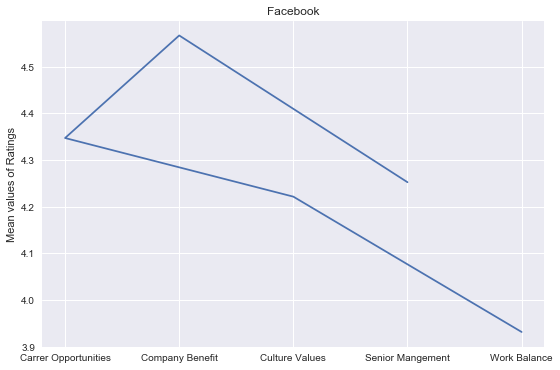

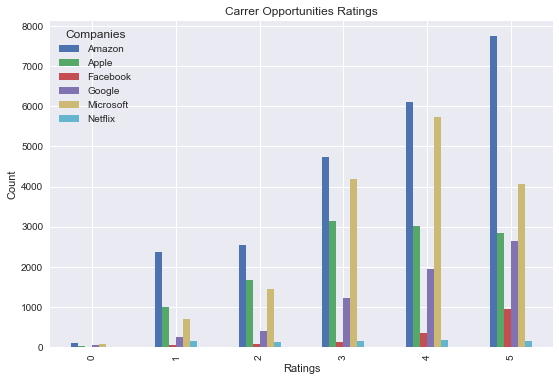

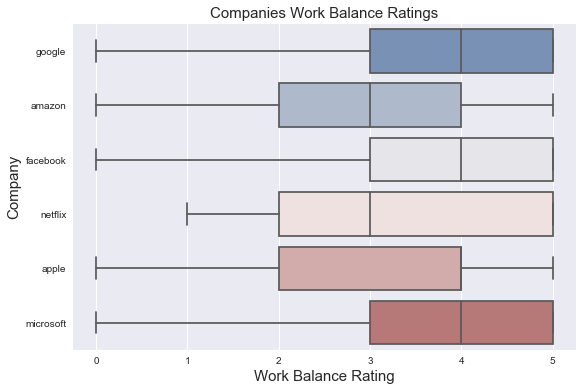

In [97]:
root = tk.Tk()
root.title('TRAILBLAZER')
root.geometry("1260x700")
root.resizable(0, 0)

menu1=Menu(root)
root.config(menu=menu1)
subMenu1=Menu(menu1)

graphMenu=Menu(menu1)                                               
menu1.add_cascade(label="Overall Analysis",menu=graphMenu)                    
graphMenu.add_command(label="Review Count",command=reviewcount)
#graphMenu.add_command(label="Date-Year Count",command=datecount)
graphMenu.add_command(label="Satisfied-Unsatisfied",command=satisfiesdUnsatisfied)

cv = tk.Canvas(width=600, height=600)
cv.pack(side='top', fill='both', expand='yes')

fname ="g.gif"
bg_image = tk.PhotoImage(file=fname)
cv.create_image(0,0, image=bg_image, anchor='nw')

cv.create_text(400,20, text="TRAILBLAZER",font=("Comic Sans MS", 50,'bold'), fill="black", anchor='nw')
cv.create_text(0,30, text="____________________________________",font=("Helvetica", 50,'bold'), fill="black", anchor='nw')

class companies:
    def __init__(self):
        self.root2 = Toplevel()
        self.root2.geometry("1280x720")
        self.root2.resizable(0, 0)
       
        fname1 ="n.gif"
        bg_image1 = tk.PhotoImage(file=fname1)
        cv2 = Canvas(self.root2, width=600, height=600)
        cv2.pack(side='top', fill='both', expand='yes')
        cv2.create_image(0,0, image=bg_image1, anchor='nw')
        
        def googlemean():
                aMeanGoogle=dataGoogle['work-balance-stars'].mean()
                bMeanGoogle=dataGoogle['culture-values-stars'].mean()
                cMeanGoogle=dataGoogle['carrer-opportunities-stars'].mean()
                dMeanGoogle=dataGoogle['comp-benefit-stars'].mean()
                eMeanGoogle=dataGoogle['senior-mangement-stars'].mean()
                
                x = ['Work Balance','Culture Values','Carrer Opportunities','Company Benefit','Senior Mangement']  
                y = [aMeanGoogle,bMeanGoogle,cMeanGoogle,dMeanGoogle,eMeanGoogle] 
                pl.figure(figsize =(15,5))     
                plt.plot(x, y) 
                plt.xlabel('') 
                plt.ylabel('Mean values of Ratings') 
                plt.title('Google') 
  
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv2)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
               
        def microsoftmean():
                aMeanMicrosoft=dataMicrosoft['work-balance-stars'].mean()
                bMeanMicrosoft=dataMicrosoft['culture-values-stars'].mean()
                cMeanMicrosoft=dataMicrosoft['carrer-opportunities-stars'].mean()
                dMeanMicrosoft=dataMicrosoft['comp-benefit-stars'].mean()
                eMeanMicrosoft=dataMicrosoft['senior-mangement-stars'].mean()
                
                x = ['Work Balance','Culture Values','Carrer Opportunities','Company Benefit','Senior Mangement'] 
                y = [aMeanMicrosoft,bMeanMicrosoft,cMeanMicrosoft,dMeanMicrosoft,eMeanMicrosoft] 
                pl.figure(figsize =(15,5))    
                plt.plot(x, y) 
                plt.xlabel('') 
                plt.ylabel('Mean values of Ratings') 
                plt.title('Microsoft') 
    
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv2)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
        
        def applemean():
                aMeanApple=dataApple['work-balance-stars'].mean()
                bMeanApple=dataApple['culture-values-stars'].mean()
                cMeanApple=dataApple['carrer-opportunities-stars'].mean()
                dMeanApple=dataApple['comp-benefit-stars'].mean()
                eMeanApple=dataApple['senior-mangement-stars'].mean()
                
                x = ['Work Balance','Culture Values','Carrer Opportunities','Company Benefit','Senior Mangement'] 
                y = [aMeanApple,bMeanApple,cMeanApple,dMeanApple,eMeanApple] 
                pl.figure(figsize =(15,5))    
                plt.plot(x, y) 
                plt.xlabel('') 
                plt.ylabel('Mean values of Ratings') 
                plt.title('Apple') 
    
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv2)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
                
        def facebookmean():
                aMeanFacebook=dataFacebook['work-balance-stars'].mean()
                bMeanFacebook=dataFacebook['culture-values-stars'].mean()
                cMeanFacebook=dataFacebook['carrer-opportunities-stars'].mean()
                dMeanFacebook=dataFacebook['comp-benefit-stars'].mean()
                eMeanFacebook=dataFacebook['senior-mangement-stars'].mean()
                
                x = ['Work Balance','Culture Values','Carrer Opportunities','Company Benefit','Senior Mangement'] 
                y = [aMeanFacebook,bMeanFacebook,cMeanFacebook,dMeanFacebook,eMeanFacebook]   
                pl.figure(figsize =(15,5))     
                plt.plot(x, y) 
                plt.xlabel('') 
                plt.ylabel('Mean values of Ratings') 
                plt.title('Facebook') 
    
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv2)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
                
        def amazonmean():
                aMeanAmazon=dataAmazon['work-balance-stars'].mean()
                bMeanAmazon=dataAmazon['culture-values-stars'].mean()
                cMeanAmazon=dataAmazon['carrer-opportunities-stars'].mean()
                dMeanAmazon=dataAmazon['comp-benefit-stars'].mean()
                eMeanAmazon=dataAmazon['senior-mangement-stars'].mean()
                
                x = ['Work Balance','Culture Values','Carrer Opportunities','Company Benefit','Senior Mangement'] 
                y = [aMeanAmazon,bMeanAmazon,cMeanAmazon,dMeanAmazon,eMeanAmazon] 
                pl.figure(figsize =(15,5))     
                plt.plot(x, y) 
                plt.xlabel('') 
                plt.ylabel('Mean values of Ratings') 
                plt.title('Amazon') 
    
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv2)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
                
        def netflixmean():
                aMeanNetflix=dataNetflix['work-balance-stars'].mean()
                bMeanNetflix=dataNetflix['culture-values-stars'].mean()
                cMeanNetflix=dataNetflix['carrer-opportunities-stars'].mean()
                dMeanNetflix=dataNetflix['comp-benefit-stars'].mean()
                eMeanNetflix=dataNetflix['senior-mangement-stars'].mean()
                
                x = ['Work Balance','Culture Values','Carrer Opportunities','Company Benefit','Senior Mangement']  
                y = [aMeanNetflix,bMeanNetflix,cMeanNetflix,dMeanNetflix,eMeanNetflix]   
                pl.figure(figsize =(15,5))     
                plt.plot(x, y) 
                plt.xlabel('') 
                plt.ylabel('Mean values of Ratings') 
                plt.title('Netflix') 

                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv2)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
                
        cv2.create_text(280,20, text="Every company is being analysed using various ratings",
                        font=("Comic Sans MS", 20), fill="white", anchor='nw')
        cv2.create_text(310,50, text="(i.e. overall, work balance, culture value, carrer opporunities, company benefits, senior management)",
                        font=("Helvetica", 10), fill="white", anchor='nw')
        cv2.create_text(0,70, text="_________________________________________________________________________________________________________________________________",
                       font=("Helvetica", 15), fill="grey", anchor='nw')
        
        
        cv2.create_text(30,280, text="Choose the Company:",font=("MS Sans Serif", 14), fill="white", 
                   anchor='nw')
        
        var = IntVar()
        R1 = Radiobutton(cv2, text="GOOGLE      ", variable=var, value=1,width=8,fg="white",bg="#292928",
                         command=googlemean)
        R1.place(x=230,y=310,anchor='nw' )
        R2 = Radiobutton(cv2, text="MICROSOFT", variable=var, value=2,width=8,fg="white",bg="#292928",
                         command=microsoftmean)
        R2.place(x=230,y=340,anchor='nw' )
        R3 = Radiobutton(cv2, text="APPLE           ", variable=var, value=3,width=8,fg="white",bg="#292928",
                         command=applemean)
        R3.place(x=230,y=370,anchor='nw' )
        R4 = Radiobutton(cv2, text="FACEBOOK ", variable=var, value=4,width=8,fg="white",bg="#292928",
                         command=facebookmean)
        R4.place(x=230,y=400,anchor='nw' )
        R5 = Radiobutton(cv2, text="AMAZON    ", variable=var, value=5,width=8,fg="white",bg="#292928",
                         command=amazonmean)
        R5.place(x=230,y=430,anchor='nw' )
        R6 = Radiobutton(cv2, text="NETFLIX     ", variable=var, value=6,width=8,fg="white",bg="#292928",
                         command=netflixmean)
        R6.place(x=230,y=460,anchor='nw' )
        
        btn2 = tk.Button(cv2, text="EXIT", command=root.destroy)
        btn2.place(x=1150,y=650,anchor='nw' )
        cv2.mainloop()

class ratings:
    def __init__(self):
        self.root3 = Toplevel()
        self.root3.geometry("1280x720")
        self.root3.resizable(0, 0)
       
        fname1 ="nn.gif"
        bg_image1 = tk.PhotoImage(file=fname1)
        cv3 = Canvas(self.root3, width=600, height=600)
        cv3.pack(side='top', fill='both', expand='yes')
        cv3.create_image(0,0, image=bg_image1, anchor='nw')
        
        def overallrating():     
            dataGOverall=dataGoogle.groupby(['overall-ratings'])['overall-ratings'].size()
            dataMOverall=dataMicrosoft.groupby(['overall-ratings'])['overall-ratings'].size()
            dataAOverall=dataApple.groupby(['overall-ratings'])['overall-ratings'].size()
            dataFOverall=dataFacebook.groupby(['overall-ratings'])['overall-ratings'].size()
            dataAMOverall=dataAmazon.groupby(['overall-ratings'])['overall-ratings'].size()
            dataNOverall=dataNetflix.groupby(['overall-ratings']).size()
            
            def overallgraph():
                dfbar = pd.DataFrame({'Amazon':dataAMOverall, 'Facebook': dataFOverall, 'Apple': dataAOverall,
                                      'Microsoft': dataMOverall, 'Netflix': dataNOverall, 'Google':dataGOverall})
                
                dfbar.plot.bar(figsize=(16, 6))
                plt.xlabel("Ratings")
                plt.ylabel("Count")
                plt.title("Overall Ratings")
                plt.legend(title="Companies")
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show()
            
            def overallboxgraph():
                pl.figure(figsize =(10,5))
                sns.boxplot(x="overall-ratings", y="company", data=data, whis="range", palette="vlag")
                plt.xlabel('Overall Rating', fontsize=15)
                plt.ylabel('Company', fontsize=15)
                plt.title('Companies Overall Ratings', fontsize=15)
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show()
                
            cv3.create_text(30,410, text="Choose the Plot:",font=("MS Sans Serif", 14), fill="white", 
                   anchor='nw')
            R1 = Radiobutton(cv3, text="Rating groupby each Company", variable=var, value=1,width=25,
                         fg="white",bg="#292928",command=overallgraph)
            R1.place(x=200,y=440,anchor='nw' )
            R2 = Radiobutton(cv3, text="Median value for each Company", variable=var, value=2,width=25,
                         fg="white",bg="#292928",command=overallboxgraph)
            R2.place(x=200,y=470,anchor='nw' )
            
        def workbalancerating(): 
            dataGWork=dataGoogle.groupby(['work-balance-stars'])['work-balance-stars'].size()
            dataMWork=dataMicrosoft.groupby(['work-balance-stars'])['work-balance-stars'].size()
            dataAWork=dataApple.groupby(['work-balance-stars'])['work-balance-stars'].size()
            dataFWork=dataFacebook.groupby(['work-balance-stars'])['work-balance-stars'].size()
            dataAMWork=dataAmazon.groupby(['work-balance-stars'])['work-balance-stars'].size()
            dataNWork=dataNetflix.groupby(['work-balance-stars'])['work-balance-stars'].size()
            
            def workblancegraph():
                dfbar = pd.DataFrame({'Amazon':dataAMWork, 'Facebook': dataFWork, 'Apple': dataAWork,
                                      'Microsoft': dataMWork, 'Netflix': dataNWork, 'Google':dataGWork})
                dfbar.plot.bar(figsize=(16, 6))
                plt.xlabel("Ratings")
                plt.ylabel("Count")
                plt.title("Work Balance Ratings")
                plt.legend(title="Companies")
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show()
            
            def workblanceboxgraph():
                pl.figure(figsize =(10,5))
                sns.boxplot(x="work-balance-stars", y="company", data=data, whis="range", palette="vlag")
                plt.xlabel('Work Balance Rating', fontsize=15)
                plt.ylabel('Company', fontsize=15)
                plt.title('Companies Work Balance Ratings', fontsize=15)
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show()
                
            cv3.create_text(30,410, text="Choose the Plot:",font=("MS Sans Serif", 14), fill="white", 
                   anchor='nw', tags="label3")
            R1 = Radiobutton(cv3, text="Rating groupby each Company", variable=var, value=1,width=25,
                         fg="white",bg="#292928",command=workblancegraph)
            R1.place(x=200,y=440,anchor='nw' )
            R2 = Radiobutton(cv3, text="Median value for each Company", variable=var, value=2,width=25,
                         fg="white",bg="#292928",command=workblanceboxgraph)
            R2.place(x=200,y=470,anchor='nw' )
            
        def culturevaluerating():
            dataGCulture=dataGoogle.groupby(['culture-values-stars'])['culture-values-stars'].size()
            dataMCulture=dataMicrosoft.groupby(['culture-values-stars'])['culture-values-stars'].size()
            dataACulture=dataApple.groupby(['culture-values-stars'])['culture-values-stars'].size()
            dataFCulture=dataFacebook.groupby(['culture-values-stars'])['culture-values-stars'].size()
            dataAMCulture=dataAmazon.groupby(['culture-values-stars'])['work-balance-stars'].size()
            dataNCulture=dataNetflix.groupby(['culture-values-stars'])['work-balance-stars'].size()
            
            def culturevaluegraph():
                dfbar = pd.DataFrame({'Amazon':dataAMCulture, 'Facebook': dataFCulture, 'Apple': dataACulture,
                                      'Microsoft': dataMCulture, 'Netflix': dataNCulture, 'Google':dataGCulture})
                dfbar.plot.bar(figsize=(16, 6))
                plt.xlabel("Ratings")
                plt.ylabel("Count")
                plt.title("Culture Value Ratings")
                plt.legend(title="Companies")
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
                
            def culturevalueboxgraph():
                pl.figure(figsize =(10,5))
                sns.boxplot(x="culture-values-stars", y="company", data=data, whis="range", palette="vlag")
                plt.xlabel('Culture Values Rating', fontsize=15)
                plt.ylabel('Company', fontsize=15)
                plt.title('Companies Culture Values Ratings', fontsize=15) 
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
                
            cv3.create_text(30,410, text="Choose the Plot:",font=("MS Sans Serif", 14), fill="white", 
                   anchor='nw')
            R1 = Radiobutton(cv3, text="Rating groupby each Company", variable=var, value=1,width=25,
                         fg="white",bg="#292928",command=culturevaluegraph)
            R1.place(x=200,y=440,anchor='nw' )
            R2 = Radiobutton(cv3, text="Median value for each Company", variable=var, value=2,width=25,
                         fg="white",bg="#292928",command=culturevalueboxgraph)
            R2.place(x=200,y=470,anchor='nw' )
            
        def carreropporunitiesrating():
            dataGCarrer=dataGoogle.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
            dataMCarrer=dataMicrosoft.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
            dataACarrer=dataApple.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
            dataFCarrer=dataFacebook.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
            dataAMCarrer=dataAmazon.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
            dataNCarrer=dataNetflix.groupby(['carrer-opportunities-stars'])['carrer-opportunities-stars'].size()
            
            def carreropporunitiesgraph():
                dfbar = pd.DataFrame({'Amazon':dataAMCarrer, 'Facebook': dataFCarrer, 'Apple': dataACarrer,
                                      'Microsoft': dataMCarrer, 'Netflix': dataNCarrer, 'Google':dataGCarrer})
                dfbar.plot.bar(figsize=(16, 6))
                plt.xlabel("Ratings")
                plt.ylabel("Count")
                plt.title("Carrer Opportunities Ratings")
                plt.legend(title="Companies")
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
                
            def carreropporunitiesboxgraph():
                pl.figure(figsize =(10,5))
                sns.boxplot(x="carrer-opportunities-stars", y="company", data=data, whis="range", palette="vlag")
                plt.xlabel('Career Opportunities Stars', fontsize=15)
                plt.ylabel('Company', fontsize=15)
                plt.title('Companies Career Opportunities Stars', fontsize=15)
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show()
                
            cv3.create_text(30,410, text="Choose the Plot:",font=("MS Sans Serif", 14), fill="white", 
                   anchor='nw')
            R1 = Radiobutton(cv3, text="Rating groupby each Company", variable=var, value=1,width=25,
                         fg="white",bg="#292928",command=carreropporunitiesgraph)
            R1.place(x=200,y=440,anchor='nw' )
            R2 = Radiobutton(cv3, text="Median value for each Company", variable=var, value=2,width=25,
                         fg="white",bg="#292928",command=carreropporunitiesboxgraph)
            R2.place(x=200,y=470,anchor='nw' )
            
        def companybenefitrating():
            dataGComp=dataGoogle.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
            dataMComp=dataMicrosoft.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
            dataAComp=dataApple.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
            dataFComp=dataFacebook.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
            dataAMComp=dataAmazon.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()
            dataNComp=dataNetflix.groupby(['comp-benefit-stars'])['comp-benefit-stars'].size()

            def companybenefitgraph():
                dfbar = pd.DataFrame({'Amazon':dataAMComp, 'Facebook': dataFComp, 'Apple': dataAComp,
                                      'Microsoft': dataMComp, 'Netflix': dataNComp, 'Google':dataGComp})
                dfbar.plot.bar(figsize=(16, 6))
                plt.xlabel("Ratings")
                plt.ylabel("Count")
                plt.title("Company Benefit Ratings")
                plt.legend(title="Companies")
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show()
                
            def companybenefitboxgraph():
                pl.figure(figsize =(10,5))
                sns.boxplot(x="comp-benefit-stars", y="company", data=data, whis="range", palette="vlag")
                plt.xlabel('Company Benefits Stars', fontsize=15)
                plt.ylabel('Company', fontsize=15)
                plt.title('Companies Benefits Stars', fontsize=15)
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show()
            
            cv3.create_text(30,410, text="Choose the Plot:",font=("MS Sans Serif", 14), fill="white", 
                   anchor='nw')
            R1 = Radiobutton(cv3, text="Rating groupby each Company", variable=var, value=1,width=25,
                         fg="white",bg="#292928",command=companybenefitgraph)
            R1.place(x=200,y=440,anchor='nw' )
            R2 = Radiobutton(cv3, text="Median value for each Company", variable=var, value=2,width=25,
                         fg="white",bg="#292928",command=companybenefitboxgraph)
            R2.place(x=200,y=470,anchor='nw' )
            
        def seniormanagementrating():
            dataGSenior=dataGoogle.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
            dataMSenior=dataMicrosoft.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
            dataASenior=dataApple.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
            dataFSenior=dataFacebook.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
            dataAMSenior=dataAmazon.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()
            dataNSenior=dataNetflix.groupby(['senior-mangement-stars'])['senior-mangement-stars'].size()

            def seniormanagementgraph():
                dfbar = pd.DataFrame({'Amazon':dataAMSenior, 'Facebook': dataFSenior, 'Apple': dataASenior,
                                      'Microsoft': dataMSenior, 'Netflix': dataNSenior, 'Google':dataGSenior})
                dfbar.plot.bar(figsize=(16, 6))
                plt.xlabel("Ratings")
                plt.ylabel("Count")
                plt.title("Senior Mangement Ratings")
                plt.legend(title="Companies")
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show() 
                
            def seniormanagementboxgraph():
                pl.figure(figsize =(10,5))
                sns.boxplot(x="senior-mangement-stars", y="company", data=data, whis="range", palette="vlag")
                plt.xlabel('Senior Management Stars', fontsize=15)
                plt.ylabel('Company', fontsize=15)
                plt.title('Companies Senior Management Stars', fontsize=15)
                
                fig=plt.gcf()
                fig.set_size_inches(9,6)
                dataPlot = FigureCanvasTkAgg(fig, master=cv3)
                dataPlot.get_tk_widget().place(x=580,y=180,anchor='nw' )
                plt.show()
                
            cv3.create_text(30,410, text="Choose the Plot:",font=("MS Sans Serif", 14), fill="white", 
                   anchor='nw')
            R1 = Radiobutton(cv3, text="Rating groupby each Company", variable=var, value=1,width=25,
                         fg="white",bg="#292928",command=seniormanagementgraph)
            R1.place(x=200,y=440,anchor='nw' )
            R2 = Radiobutton(cv3, text="Median value for each Company", variable=var, value=2,width=25,
                         fg="white",bg="#292928",command=seniormanagementboxgraph)
            R2.place(x=200,y=470,anchor='nw' )
            
        cv3.create_text(350,20, text="Ratings are used to access the employee's experience",
                        font=("Comic Sans MS", 20), fill="white", anchor='nw')
        cv3.create_text(490,50, text="(Companies: Google, Microsoft, Apple, Facebook, Amazon, Netflix)",
                        font=("Helvetica", 10), fill="white", anchor='nw')
        cv3.create_text(0,70, text="_________________________________________________________________________________________________________________________________",
                       font=("Helvetica", 15), fill="grey", anchor='nw')
        
        cv3.create_text(30,200, text="Choose the Rating:",font=("MS Sans Serif", 14), fill="white", 
                   anchor='nw')
        
        var = IntVar()
        R1 = Radiobutton(cv3, text="OVERALL RATING                          ", variable=var, value=1,width=25,
                         fg="white",bg="#292928",command=overallrating)
        R1.place(x=200,y=230,anchor='nw' )
        R2 = Radiobutton(cv3, text="WORK BALANCE RATING             ", variable=var, value=2,width=25,
                         fg="white",bg="#292928",command=workbalancerating)
        R2.place(x=200,y=260,anchor='nw' )
        R3 = Radiobutton(cv3, text="CULTURE VALUE RATING            ", variable=var, value=3,width=25,
                         fg="white",bg="#292928",command=culturevaluerating)
        R3.place(x=200,y=290,anchor='nw' )
        R4 = Radiobutton(cv3, text="CARRER OPPORUNITIES RATING", variable=var, value=4,width=25,
                         fg="white",bg="#292928",command=carreropporunitiesrating)
        R4.place(x=200,y=320,anchor='nw' )
        R5 = Radiobutton(cv3, text="COMPANY BENEFIT RATING         ", variable=var, value=5,width=25,
                         fg="white",bg="#292928",command=companybenefitrating)
        R5.place(x=200,y=350,anchor='nw' )
        R6 = Radiobutton(cv3, text="SENIOR MANAGEMENT RATING    ", variable=var, value=6,width=25,
                         fg="white",bg="#292928",command=seniormanagementrating)
        R6.place(x=200,y=380,anchor='nw' )
        
        btn2 = tk.Button(cv3, text="EXIT", command=root.destroy)
        btn2.place(x=1150,y=650,anchor='nw' )
        
        
        cv3.mainloop()
        
def knowTheTrends():
    cv.create_text(0,310, text="____________________________________________________________________________________________________________",
                   font=("Comic Sans MS", 20, "bold"), fill="black", anchor='nw')
    cv.create_text(410,360, text="On the basis of what you would like to know?",font=("Comic Sans MS", 15,'bold'), fill="black", 
                   anchor='nw')
    
    var = IntVar()
    R3 = Radiobutton(cv, text="Companies", variable=var, value=1,width=15,font =('MS Sans Serif', 12, 'bold'),fg="white", bg="black",command=companies)
    R3.place(x=520,y=400,anchor='nw' )
    R4 = Radiobutton(cv, text="Ratings", variable=var, value=2,width=15,font =('MS Sans Serif', 12, 'bold'),fg="white", bg="black",command=ratings)
    R4.place(x=520,y=480,anchor='nw' )
    
    

class knowByYou:   
    def __init__(self):
        def reset():
            employeename.set("")
            companyy.set("")
            workBalance.set("")
            cultureValue.set("")
            carrerOpporunties.set("")
            companyBenefit.set("")
            seniorManagement.set("")
            cv1.delete('label')
            
        def getvalues():
            
            name=employeename.get()
            comp=companyy.get()
            lis1=[]
            a1=workBalance.get()
            a2=cultureValue.get()
            a3=carrerOpporunties.get()
            a4=companyBenefit.get()
            a5=seniorManagement.get()

            lis1.append(a1)
            lis1.append(a2)
            lis1.append(a3)
            lis1.append(a4)
            lis1.append(a5)
    
            ind=['Work Balance Ratings','Culture Values Ratings','Carrer Opportunities Ratings',
                    'Company Benefit Ratings','Senior Mangement Ratings']
        
            X_test=pd.DataFrame(lis1,index=ind).values.reshape(1,-1)
           
            model=SVC(gamma='auto')
            model.fit(X_train,y_train) 
            predictions = model.predict(X_test) 
            print(predictions)
            if predictions==0:
                cv1.create_text(500,500, text=name+" working in "+comp+" is UNSATISFIED",font=("Helvetica", 15,'bold'),
                                fill="red", anchor='nw',tags=('label'))
            else:
                cv1.create_text(500,500, text=name+" working in "+comp+" is SATISFIED",font=("Helvetica", 15,'bold'),
                                fill="green", anchor='nw',tags=('label'))
            
        self.root1 = Toplevel()
        self.root1.geometry("1280x720")
        
        fname1 ="knowByYouu.gif"
        bg_image1 = tk.PhotoImage(file=fname1)
        cv1 = Canvas(self.root1, width=600, height=600)
        cv1.pack(side='top', fill='both', expand='yes')
        cv1.create_image(0,0, image=bg_image1, anchor='nw')
        cv1.create_text(500,20, text="Know By You",font=("Comic Sans MS", 40,"bold"), fill="white", anchor='nw')
        cv1.create_text(0,90, text="_________________________________________________________________________________________________________________________________",
                       font=("Helvetica", 15,"bold"), fill="grey", anchor='nw')
        
        cv1.create_text(400,120, text="Employee Name",font=("Helvetica", 13),fill="white", anchor='nw')
        cv1.create_text(400,160, text="Company",font=("Helvetica", 13),fill="white", anchor='nw')
        cv1.create_text(400,200, text="Work Balance Ratings",font=("Helvetica", 13),fill="white", anchor='nw')
        cv1.create_text(400,240, text="Culture Values Ratings",font=("Helvetica", 13),fill="white", anchor='nw')
        cv1.create_text(400,280, text="Carrer Opportunities Ratings",font=("Helvetica", 13),fill="white", anchor='nw')
        cv1.create_text(400,320, text="Company Benefit Ratings",font=("Helvetica", 13),fill="white", anchor='nw')
        cv1.create_text(400,360, text="Senior Mangement Ratings",font=("Helvetica", 13),fill="white", anchor='nw')
        
        employeename = StringVar()
        companyy=StringVar()
        workBalance = IntVar()
        cultureValue= IntVar()
        carrerOpporunties= IntVar()
        companyBenefit= IntVar()
        seniorManagement= IntVar()

        entry0=tk.Entry(cv1,textvariable = employeename, font = ('arial', 13, 'bold'), bd = 8, insertwidth = 4,
                        justify = 'left').place(x=650,y=120,anchor='nw' )
        entry1=tk.Entry(cv1,textvariable = companyy, font = ('arial', 13, 'bold'), bd = 8, insertwidth = 4,
                        justify = 'left').place(x=650,y=160,anchor='nw' )
        entry2=tk.Entry(cv1,textvariable = workBalance, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,
                        justify = 'left').place(x=650,y=200,anchor='nw' )
        entry3=tk.Entry(cv1,textvariable = cultureValue, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,
                        justify = 'left').place(x=650,y=240,anchor='nw' )
        entry4=tk.Entry(cv1,textvariable = carrerOpporunties, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,
                        justify = 'left').place(x=650,y=280,anchor='nw' )
        entry5=tk.Entry(cv1,textvariable = companyBenefit, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,
                      justify = 'left').place(x=650,y=320,anchor='nw' )
        entry6=tk.Entry(cv1,textvariable = seniorManagement, font = ('arial', 12, 'bold'), bd = 8, insertwidth = 4,
                        justify = 'left').place(x=650,y=360,anchor='nw' )

        btn2=tk.Button(cv1,text = "Show Result",command=getvalues)
        btn2.place(x=700,y=450,anchor='se' )
        
        btn3=tk.Button(cv1,text = "Reset",command= reset)
        btn3.place(x=600,y=450,anchor='se' )
        cv1.mainloop()

cv.create_text(430,140, text="What would you like to know?",font=("Comic Sans MS", 20,'bold'), fill="black", anchor='nw')
    
var = IntVar()
R1 = Radiobutton(cv, text="Know the Trends", variable=var, value=1,width=15,font =('MS Sans Serif', 12, 'bold'),
                 fg="white", bg="black",command=knowTheTrends)
R1.place(x=520,y=200,anchor='nw' )
R2 = Radiobutton(cv, text="Know by You", variable=var, value=2, width=15, font =('MS Sans Serif', 12, 'bold'),
                 fg="white", bg="black",command=knowByYou)
R2.place(x=520,y=280,anchor='nw' )

btn1 = tk.Button(cv, text="EXIT",font =('arial', 18, 'bold'), command=root.destroy)
btn1.place(x=1150,y=620,anchor='se' )

root.mainloop()